In [14]:
import pandas as pd
import numpy as np

In [2]:
ds = pd.read_csv("train.csv",usecols=['Age', 'Fare', 'Survived'])

In [3]:
ds.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [4]:
# lets check the missing values
ds.isnull().mean()

Survived    0.000000
Age         0.198653
Fare        0.000000
dtype: float64

### Note
Imputation should be done in train as well as test set. For now we will consider only the training set.

In [5]:
# Lets create new columns and fill the missing value and compare with the original values

# impute with 99
ds['Age_99'] = ds['Age'].fillna(99)

# impute with -1
ds['Age_minus1'] = ds['Age'].fillna(-1)


In [6]:
# lets print the dataset
ds.head(10)

,Survived,Age,Fare,Age_99,Age_minus1
0,0,22.0,7.2500,22.0,22.0
1,1,38.0,71.2833,38.0,38.0
2,1,26.0,7.9250,26.0,26.0
3,1,35.0,53.1000,35.0,35.0
4,0,35.0,8.0500,35.0,35.0
5,0,NaN,8.4583,99.0,-1.0
6,0,54.0,51.8625,54.0,54.0
7,0,2.0,21.0750,2.0,2.0
8,1,27.0,11.1333,27.0,27.0
9,1,14.0,30.0708,14.0,14.0


In [8]:
# let's compare the variance after imputation.
# This is expected as the percentage of missing data is high in Age, ~20%.


print('Original variable variance: ', ds['Age'].var())
print('Variance after imputing value 99: ', ds['Age_99'].var())
print('Variance after imputing value -1: ', ds['Age_minus1'].var())

Original variable variance:  211.01912474630802
Variance after imputing value 99:  934.439777589377
Variance after imputing value -1:  319.24742711837473


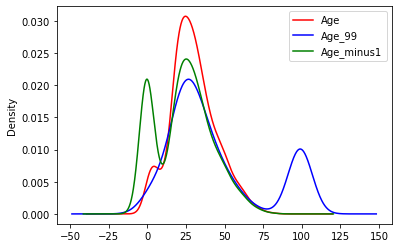

In [9]:
# lets compare the plot
# We can see that the distribution has changed:
# there are now more values towards any arbitrary value

import matplotlib.pyplot as plt
%matplotlib inline

fig = plt.figure()
ax = fig.add_subplot(111)
ds['Age'].plot(kind="kde", ax=ax, color="red")
ds['Age_99'].plot(kind="kde", ax=ax, color="blue")
ds['Age_minus1'].plot(kind="kde", ax=ax, color="green")

lines,_=ax.get_legend_handles_labels()
ax.legend(lines, ['Age','Age_99', 'Age_minus1'], loc="best")

In [12]:
# Also we know that imputation may affect the relationship with other variables in dataset

# Let's compare the covariance

ds[['Fare', 'Age', 'Age_99', 'Age_minus1']].cov()

,Fare,Age,Age_99,Age_minus1
Fare,2469.436846,73.849030,-79.289945,120.494157
Age,73.849030,211.019125,211.019125,211.019125
Age_99,-79.289945,211.019125,934.439778,-170.001251
Age_minus1,120.494157,211.019125,-170.001251,319.247427


/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


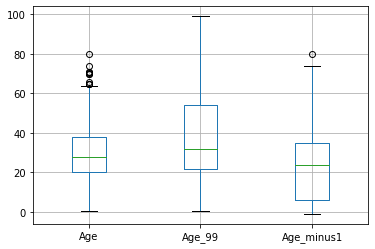

In [13]:
# Let's see the effect of imputation on outliers
# Let's find out using a boxplot.
ds[['Age', 'Age_99', 'Age_minus1']].boxplot()

So we can see that imputing the NaN values with the end of distribution values, will mask the values that were outlier in the original distribution.

Now we have to do the same steps for test set as well.

### NOTE:
Use of this technique depends on the machine learning model we want to build. Linear models assume that the variables are normally distributed. Arbitrary value imputation may distort the original normal distribution if the percentage of missing data is high. Therefore, the final imputed variable will no longer be normally distributed, which in turn may affect the linear model performance.

On the other hand, this technique works quite well with tree-based algorithms.